In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns


In [11]:
from env import host, user, password

url = f'mysql+pymysql://{user}:{password}@{host}/iris_db'

In [14]:
species=pd.read_sql('Select * FROM species', url).head(10)
species

,species_id,species_name
0,1,setosa
1,2,versicolor
2,3,virginica


In [18]:
measurements=pd.read_sql('Select * FROM measurements', url)
measurements

,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_id
0,1,5.1,3.5,1.4,0.2,1
1,2,4.9,3.0,1.4,0.2,1
2,3,4.7,3.2,1.3,0.2,1
3,4,4.6,3.1,1.5,0.2,1
4,5,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,3
146,147,6.3,2.5,5.0,1.9,3
147,148,6.5,3.0,5.2,2.0,3
148,149,6.2,3.4,5.4,2.3,3


In [21]:
species_measurements = pd.merge(species, measurements, left_on='species_id', right_on='species_id', how='inner')
species_measurements

,species_id,species_name,measurement_id,sepal_length,sepal_width,petal_length,petal_width
0,1,setosa,1,5.1,3.5,1.4,0.2
1,1,setosa,2,4.9,3.0,1.4,0.2
2,1,setosa,3,4.7,3.2,1.3,0.2
3,1,setosa,4,4.6,3.1,1.5,0.2
4,1,setosa,5,5.0,3.6,1.4,0.2
...,...,...,...,...,...,...,...
145,3,virginica,146,6.7,3.0,5.2,2.3
146,3,virginica,147,6.3,2.5,5.0,1.9
147,3,virginica,148,6.5,3.0,5.2,2.0
148,3,virginica,149,6.2,3.4,5.4,2.3


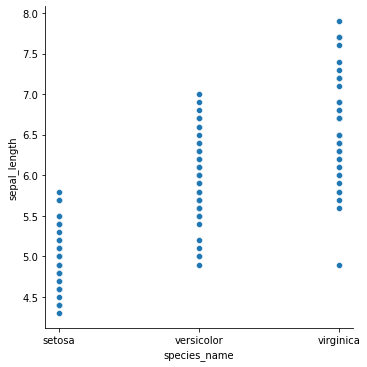

In [22]:
sns.relplot(x='species_name', y = 'sepal_length', data =species_measurements)

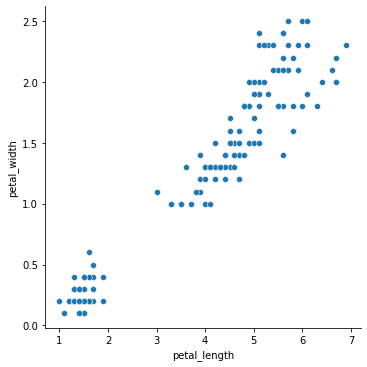

In [23]:
sns.relplot(x='petal_length', y = 'petal_width', data =species_measurements)

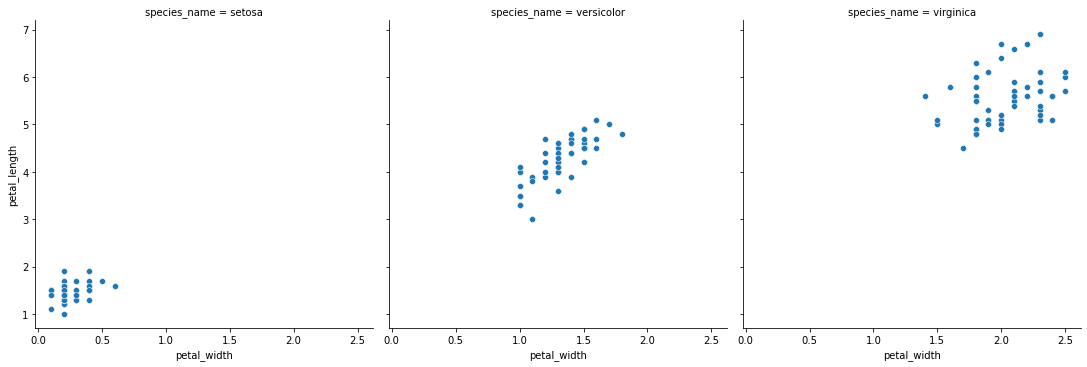

In [24]:
sns.relplot(x='petal_width', y='petal_length', col='species_name',  data =species_measurements)

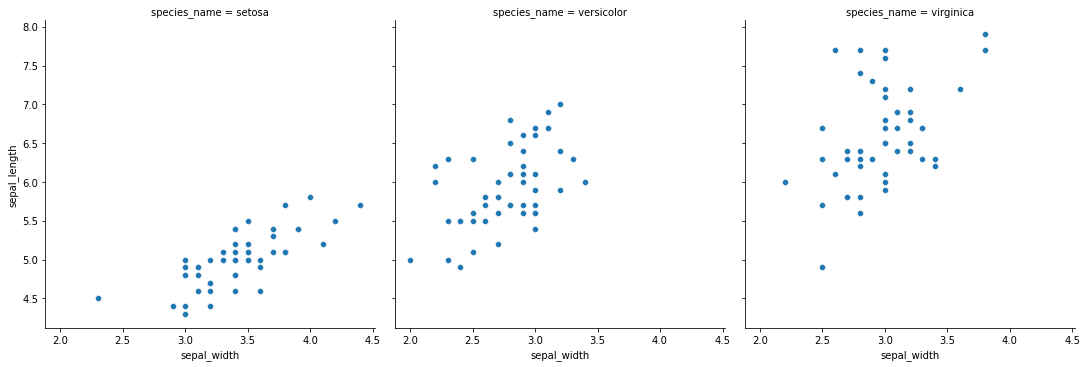

In [25]:
sns.relplot(x='sepal_width', y='sepal_length', col='species_name',  data =species_measurements)

In [26]:
anscombe = sns.load_dataset('anscombe')

anscombe.dtypes

dataset     object
x          float64
y          float64
dtype: object

In [30]:
anscombe.groupby(by = 'dataset').sum()

,x,y
dataset,,
I,99.0,82.51
II,99.0,82.51
III,99.0,82.50
IV,99.0,82.51


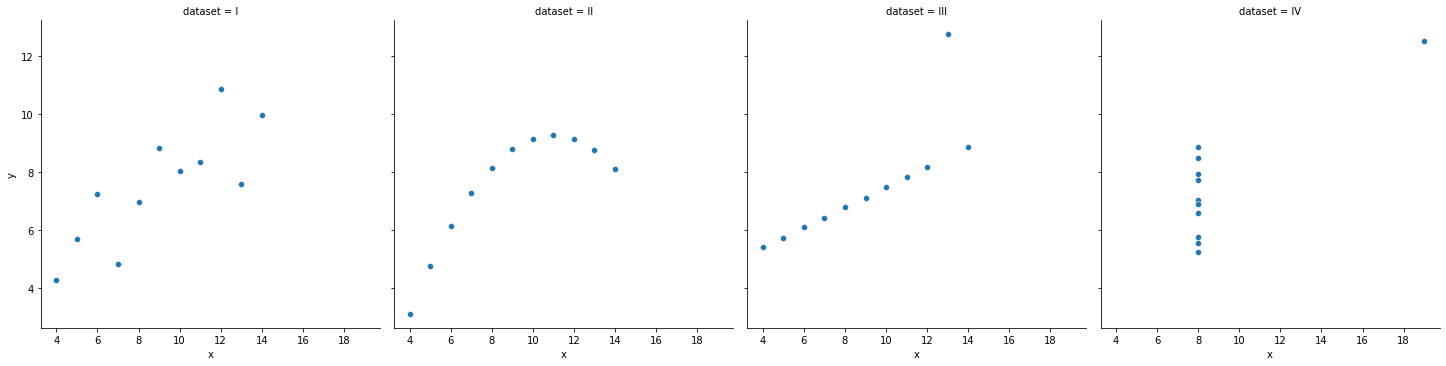

In [33]:
sns.relplot(x='x', y='y', col='dataset', data=anscombe)

In [48]:

#from pydataset import InsectSprays
from pydataset import data
InsectSprays = data('InsectSprays')




In [50]:
data('InsectSprays', show_doc=True)

InsectSprays

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Effectiveness of Insect Sprays

### Description

The counts of insects in agricultural experimental units treated with
different insecticides.

### Usage

    InsectSprays

### Format

A data frame with 72 observations on 2 variables.

[,1]

count

numeric

Insect count

[,2]

spray

factor

The type of spray

### Source

Beall, G., (1942) The Transformation of data from entomological field
experiments, _Biometrika_, **29**, 243–262.

### References

McNeil, D. (1977) _Interactive Data Analysis_. New York: Wiley.

### Examples

    require(stats); require(graphics)
    boxplot(count ~ spray, data = InsectSprays,
            xlab = "Type of spray", ylab = "Insect count",
            main = "InsectSprays data", varwidth = TRUE, col = "lightgray")
    fm1 <- aov(count ~ spray, data = InsectSprays)
    summary(fm1)
    opar <- par(mfrow = c(2, 2), oma = c(0, 0, 1.1, 0))
    plot(fm1)
 

In [56]:
InsectSprays.groupby(by= 'spray').sum()

,count
spray,
A,174
B,184
C,25
D,59
E,42
F,200


In [65]:
from pydataset import data
df=data("swiss")

df

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6
Porrentruy,76.1,35.3,9,7,90.57,26.6
Broye,83.8,70.2,16,7,92.85,23.6
Glane,92.4,67.8,14,8,97.16,24.9
Gruyere,82.4,53.3,12,7,97.67,21.0
Sarine,82.9,45.2,16,13,91.38,24.4


In [67]:
df['is_catholic'] = df.Catholic > 50
df

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality,is_catholic
Courtelary,80.2,17.0,15,12,9.96,22.2,False
Delemont,83.1,45.1,6,9,84.84,22.2,True
Franches-Mnt,92.5,39.7,5,5,93.40,20.2,True
Moutier,85.8,36.5,12,7,33.77,20.3,False
Neuveville,76.9,43.5,17,15,5.16,20.6,False
Porrentruy,76.1,35.3,9,7,90.57,26.6,True
Broye,83.8,70.2,16,7,92.85,23.6,True
Glane,92.4,67.8,14,8,97.16,24.9,True
Gruyere,82.4,53.3,12,7,97.67,21.0,True
Sarine,82.9,45.2,16,13,91.38,24.4,True


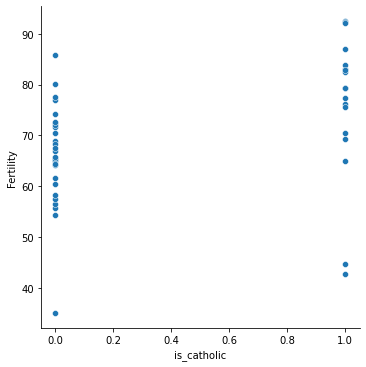

In [70]:
sns.relplot(x='is_catholic', y='Fertility', data=df)

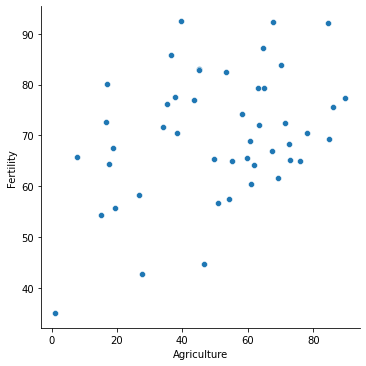

In [71]:
sns.relplot(x='Agriculture', y='Fertility', data=df)

In [104]:
from env import host, user, password

url = f'mysql+pymysql://{user}:{password}@{host}/chipotle'

In [103]:
df=pd.read_sql('Select * FROM orders', url)
df

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,$2.39
1,2,1,1,Izze,[Clementine],$3.39
2,3,1,1,Nantucket Nectar,[Apple],$3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,$2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98
...,...,...,...,...,...,...
4617,4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour Cream, Cheese, Lettuce, Guacamole]]",$11.75
4618,4619,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese, Lettuce, Guacamole]]",$11.75
4619,4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto Beans, Guacamole, Lettuce]]",$11.25
4620,4621,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettuce]]",$8.75


In [105]:
df[['item_name','quantity']].groupby(by ='item_name').sum().nlargest(4, 'quantity', keep = 'all')

,quantity
item_name,
Chicken Bowl,761
Chicken Burrito,591
Chips and Guacamole,506
Steak Burrito,386


In [106]:
df['item_price'] = df.item_price.apply(lambda value: float(value[1:].strip()))
df.groupby('item_name').item_price.agg('sum').sort_values(ascending =False).head(4)


item_name
Chicken Bowl       7342.73
Chicken Burrito    5575.82
Steak Burrito      3851.43
Steak Bowl         2260.19
Name: item_price, dtype: float64

In [ ]:
df[“column_name”] = df.index

In [ ]:
Also df = df.reset_index()